<a href="https://colab.research.google.com/github/jeremymolina/ulead-2023-lll-BCD3103/blob/main/practica_clase3_jeremy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

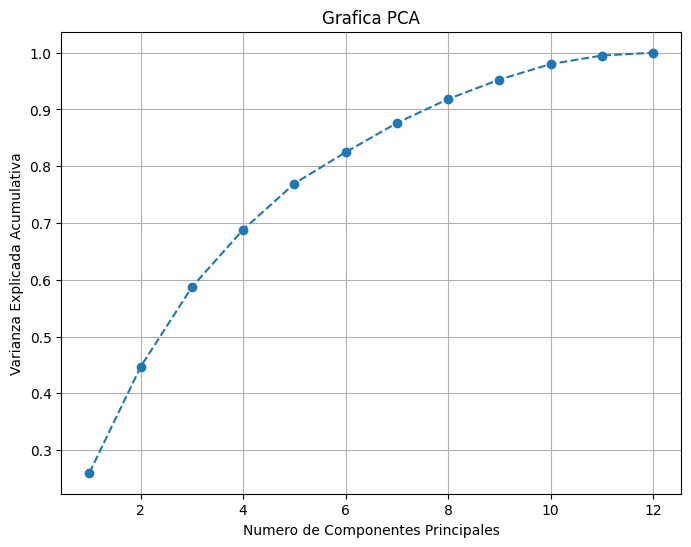

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Inventemos un data set para determinar la calidad del vino (wine_data)
# Simulemos unos datos o bien usemos una libreria
#wine_data = np.random.rand(150, 12)

url = "https://raw.githubusercontent.com/sharmaroshan/Wine-Quality-Predictions/master/winequality-red.csv"
wine_data = pd.read_csv(url)

# 1. Estadarizaremos los datos ya que el PCA es sensible a las escalades y la comunidades de los datos como un todo,
# para esto sacaremos la media y calcularemos la desviacion para obtener los datos estandarizados:
medias = np.mean(wine_data, axis=0)
desviaciones = np.std(wine_data, axis=0)
datos_estandarizados = (wine_data - medias) / desviaciones

# 2. Calcular la matriz de covarianza
# con esto podemos ver como esta la covarianza de la matriz entre si misma.
matriz_covarianza = np.cov(datos_estandarizados.T)

# 3. Calcular los eigenvectores y eigenvalores de la matriz de covarianza
# Los eigenvectores nos dan el espacio donde los datos varian mas (o menos)
eigenvalores, eigenvectores = np.linalg.eig(matriz_covarianza)

# 4. Ordenar los eigenvectores por eigenvalores descendentes
# los eigenvectores con los mayores eigenvalores capturan la mayoria de la variacion en los datos.
# Ademas como aprendimos en clase los dos primeros grupos siempre seran los mas grandes.
indices_ordenados = np.argsort(eigenvalores)[::-1]
eigenvalores = eigenvalores[indices_ordenados]
eigenvectores = eigenvectores[:, indices_ordenados]

# 5. Calcular la varianza explicada acumulativa
# Esto nos dice cuanta varianza tenemos para cada componente principal.
varianza_explicada = eigenvalores / np.sum(eigenvalores)
varianza_acumulada = np.cumsum(varianza_explicada)

# 6. Graficar la varianza explicada acumulativa
# Esta gráfica nos ayuda a decidir cuantos componentes principales debemos mantener.

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='--')
plt.xlabel('Numero de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Grafica PCA')
plt.grid(True)
plt.show()

In [ ]:
A